<a href="https://colab.research.google.com/github/r5racker/012_RahilBhensdadia/blob/main/Lab_02_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0. Import Libraries**

In [120]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [119]:
#Load Data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
datasets = pd.read_csv('/content/drive/MyDrive/Sem7/My_ML/Lab2/Datasets/Exercise-CarData.csv', index_col=[0])
print("\nData :\n",datasets)

print("\nData statistics\n",datasets.describe())


Data :
       Price   Age     KM FuelType  ... Automatic    CC  Doors  Weight
0     13500  23.0  46986   Diesel  ...         0  2000  three    1165
1     13750  23.0  72937   Diesel  ...         0  2000      3    1165
2     13950  24.0  41711   Diesel  ...         0  2000      3    1165
3     14950  26.0  48000   Diesel  ...         0  2000      3    1165
4     13750  30.0  38500   Diesel  ...         0  2000      3    1170
...     ...   ...    ...      ...  ...       ...   ...    ...     ...
1431   7500   NaN  20544   Petrol  ...         0  1300      3    1025
1432  10845  72.0     ??   Petrol  ...         0  1300      3    1015
1433   8500   NaN  17016   Petrol  ...         0  1300      3    1015
1434   7250  70.0     ??      NaN  ...         0  1300      3    1015
1435   6950  76.0      1   Petrol  ...         0  1600      5    1114

[1436 rows x 10 columns]

Data statistics
               Price          Age  ...           CC      Weight
count   1436.000000  1336.000000  ...  1436.

## **1. Apply LabelEncoder on the data to convert string labels into numeric values**

In [122]:
datasets.dropna(how='all',inplace=True)
#print("\nNew Data :",datasets)
print(datasets.dtypes)
# All rows, all columns except last 
new_X = datasets.iloc[:, :-1].values
# Only last column  
new_Y = datasets.iloc[:, -1].values 

#FuelType
new_X[:,3]=new_X[:,3].astype('str')
le = LabelEncoder()
new_X[ : ,3] = le.fit_transform(new_X[ : ,3])

print("\n\nInput before imputation : \n\n", new_X[6])


Price          int64
Age          float64
KM            object
FuelType      object
HP            object
MetColor     float64
Automatic      int64
CC             int64
Doors         object
Weight         int64
dtype: object


Input before imputation : 

 [16900 27.0 '??' 1 '????' nan 0 2000 '3']


## **2. Handling null values Imputation (Replacing null values with mean and mode value of that attribute)**

In [123]:


str_to_num_dictionary={"zero":0,"one":1,"two":2,"three":3,"four":4,"five":5,"six":6,"seven":7,"eight":8,"nune":9,"ten":10}

# 3b. Imputation (Replacing null values with mean value of that attribute)
#for col-3
for i in range(new_X[:,3].size):
  #KM
  if new_X[i,2]=="??":
    new_X[i,2]=np.nan
  #HP
  if new_X[i,4]=="????":
    new_X[i,4]=np.nan
  #Doors
  temp_str = str(new_X[i,8])
  if temp_str.isnumeric():
    new_X[i,8]=int(temp_str)
  else:
    new_X[i,8]=str_to_num_dictionary[temp_str]
# Using Imputer function to replace NaN values with mean of that parameter value 
imputer = SimpleImputer(missing_values = np.nan,strategy = "mean")
mode_imputer = SimpleImputer(missing_values = np.nan,strategy = "most_frequent")

# Fitting the data, function learns the stats 
the_imputer = imputer.fit(new_X[:, 0:3])
# fit_transform() will execute those stats on the input ie. X[:, 1:3] 
new_X[:, 0:3] = the_imputer.transform(new_X[:, 0:3])

# Fitting the data, function learns the stats 
the_mode_imputer = mode_imputer.fit(new_X[:, 3:4])   
new_X[:, 3:4] = the_mode_imputer.transform(new_X[:, 3:4])

# Fitting the data, function learns the stats 
the_imputer = imputer.fit(new_X[:, 4:5])
new_X[:, 4:5] = the_imputer.transform(new_X[:, 4:5])

# Fitting the data, function learns the stats 
the_mode_imputer = mode_imputer.fit(new_X[:, 5:6])   
new_X[:, 5:6] = the_mode_imputer.transform(new_X[:, 5:6])

# filling the missing value with mean 
print("\n\nNew Input with Mean Value for NaN : \n\n", new_X[6])



New Input with Mean Value for NaN : 

 [16900.0 27.0 68647.23997185081 1 101.47832167832168 1.0 0 2000 3]


**Converting Numpy NdArray to pandas dataframe**

In [124]:
new_datasets = pd.DataFrame(new_X,columns=datasets.columns[:-1])
new_datasets = new_datasets.astype(float)
new_datasets.dtypes

Price        float64
Age          float64
KM           float64
FuelType     float64
HP           float64
MetColor     float64
Automatic    float64
CC           float64
Doors        float64
dtype: object

## **3. Feature Selection**

             Price       Age        KM  ...  Automatic        CC     Doors
Price     1.000000 -0.845111 -0.565016  ...   0.033081  0.165067  0.185326
Age      -0.845111  1.000000  0.495199  ...   0.030931 -0.116255 -0.151785
KM       -0.565016  0.495199  1.000000  ...  -0.080743  0.296281 -0.036021
FuelType  0.022730  0.033599 -0.356238  ...   0.073860 -0.499114 -0.018434
HP        0.308414 -0.152946 -0.332984  ...   0.013753  0.053466  0.096938

[5 rows x 9 columns]


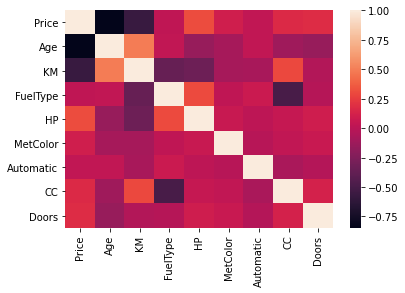

In [125]:
#feature selection
corr = new_datasets.corr()
print(corr.head())
sns.heatmap(corr)

In [126]:
columns = np.full((len(new_datasets.columns),), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = new_datasets.columns[columns]
print(selected_columns)

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors'],
      dtype='object')


In [127]:
new_datasets = new_datasets[selected_columns]

## **4. Scaling and Transformation**

In [128]:
# Step 5a : Perform scaling and standardization
new_X = new_datasets.iloc[:, :-1].values
scaler = MinMaxScaler()
std = StandardScaler()
new_X[:,0:3] = std.fit_transform(scaler.fit_transform(new_X[:,0:3]))
new_X[:,4:5] = std.fit_transform(scaler.fit_transform(new_X[:,4:5]))
new_X[:,7:9] = std.fit_transform(scaler.fit_transform(new_X[:,7:9]))

In [132]:
print("Dataset after preprocessing\n\n",new_datasets)

Dataset after preprocessing

          Price           Age        KM  ...  Automatic        CC  Doors
0     0.763763 -1.822802e+00 -0.583476  ...        0.0  2.314976    3.0
1     0.832715 -1.822802e+00  0.115551  ...        0.0  2.314976    3.0
2     0.887877 -1.767012e+00 -0.725566  ...        0.0  2.314976    3.0
3     1.163685 -1.655430e+00 -0.556163  ...        0.0  2.314976    3.0
4     0.832715 -1.432267e+00 -0.812059  ...        0.0  2.314976    3.0
...        ...           ...       ...  ...        ...       ...    ...
1431 -0.891089 -4.893269e-16 -1.295729  ...        0.0 -1.425994    3.0
1432  0.031491  9.109418e-01  0.000000  ...        0.0 -1.425994    3.0
1433 -0.615281 -4.893269e-16 -1.390761  ...        0.0 -1.425994    3.0
1434 -0.960042  7.993604e-01  0.000000  ...        0.0 -1.425994    3.0
1435 -1.042784  1.134105e+00 -1.849084  ...        0.0  0.177279    5.0

[1436 rows x 9 columns]
